Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/MachineLearning SummerSchool/data/pca


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


Text(0, 0.5, 'x2')

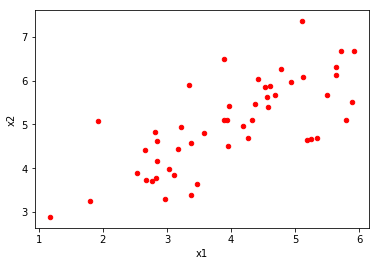

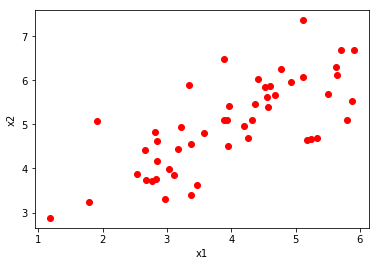

In [1]:
from google.colab import drive
drive. mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/MachineLearning SummerSchool/data/pca

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

name_file ='./data_pca.txt'

columns = ['x1','x2']
data_in = pd.read_csv(name_file, names=columns, sep=' ')

data_in.plot(kind='scatter',x='x1',y='x2',colors='red')

x1 = np.asarray(data_in['x1'])
x2 = np.asarray(data_in['x2'])

plt.figure(5)
plt.plot(x1,x2,'ro')
plt.xlabel('x1')
plt.ylabel('x2')



Define functions

In [0]:
def makemean(input_x):
  x_mean = np.zeros([len(input_x),1])
  for n in range(0,len(input_x)):
    x_mean[n] = input_x[n].sum()/len(input_x[0])
  return x_mean  

def makedatamid(input_x , x_mean):
  for n in range(0,len(input_x)):
    input_x[n] = input_x[n] - x_mean[n]
  return input_x  
  
def computecov(input_x):
  covmat = np.matmul(input_x, np.transpose(input_x))
  covmat = covmat/len(input_x[0])
  return covmat

def drawline(x1, eigenvector, u_arr):
  t = x1
  b = (eigenvector[0]/eigenvector[1])*(t-u_arr[0])+u_arr[1]
  t_ = np.arange(0,7,0.1)
  b_ = (eigenvector[1]/eigenvector[0])*(t_-u_arr[0])+u_arr[1]
  plt.plot(t_,b_,'r-')  
  #plt.plot(t,b,'bo')
  plt.plot(u_arr[0],u_arr[1],'go')
  return

def get_y_hat(new_x_arr,eigenvector):
  y_hat = np.dot(np.transpose(new_x_arr),eigenvector.reshape(-1,1))
  return y_hat
  
def make_y_return(y_hat, real_e_vector, m_x):
  y_point_0 = np.matmul(y_hat,real_e_vector.reshape(1,2))
  y_point_return = np.zeros([len(y_point_0),len(y_point_0[0])])
  y_point_return[:,0] = y_point_0[:,0]+m_x[0]
  y_point_return[:,1] = y_point_0[:,1]+m_x[1]
  return y_point_return

def get_y_hat_dia(new_x_arr,eigenvector):
  y_hat = np.dot(np.transpose(new_x_arr),eigenvector)
  return y_hat

def make_y_return_dia(y_hat, real_e_vector, m_x):
  y_point_0 = np.matmul(y_hat,np.transpose(real_e_vector))
  y_point_return = np.zeros([len(y_point_0),len(y_point_0[0])])
  y_point_return[:,0] = y_point_0[:,0]+m_x[0]
  y_point_return[:,1] = y_point_0[:,1]+m_x[1]
  y_point_return[:,2] = y_point_0[:,2]+m_x[2]
  return y_point_return
  
  

A) Reducing the dimension of some synthetic data

[2.06769855 0.30726878]
[[ 0.76908317 -0.63914872]
 [ 0.63914872  0.76908317]]
[0.76908317 0.63914872]
[[-1.49874228]
 [ 0.95842326]
 [-1.40323452]
 [-1.76425091]
 [-1.40757522]
 [ 0.87371159]
 [-1.2705341 ]
 [ 2.55069325]
 [ 0.01467385]
 [ 0.83691574]
 [ 0.70218352]
 [ 0.58710703]
 [ 0.12494323]
 [ 0.74692795]
 [-1.67633442]
 [ 2.10277216]
 [ 0.95944693]
 [-1.11631972]
 [ 2.37073581]
 [ 0.6900421 ]
 [ 2.39392811]
 [-0.44282236]
 [ 1.98340059]
 [ 0.01059725]
 [-1.83206018]
 [-0.62718606]
 [ 1.33171325]
 [ 1.45471326]
 [-1.01920169]
 [-0.01488809]
 [ 0.07208941]
 [ 1.78536119]
 [-1.41319507]
 [ 0.82641747]
 [-0.75167995]
 [ 1.40555847]
 [-1.82311313]
 [ 1.59462045]
 [-2.80785801]
 [ 0.32550217]
 [ 0.98575836]
 [-0.98462777]
 [-1.38955413]
 [ 1.03738884]
 [-1.87688554]
 [ 0.24535621]
 [-3.51802346]
 [-1.54855517]
 [-0.34417837]
 [ 1.55983868]]
[[-1.15265745 -0.95791921]
 [ 0.7371072   0.612575  ]
 [-1.07920405 -0.89687555]
 [-1.35685567 -1.12761871]
 [-1.0825424  -0.8996499 ]
 [ 0.671956

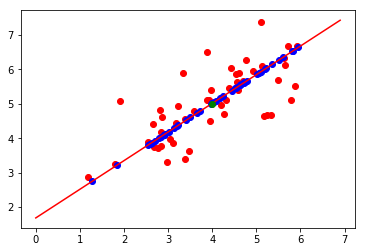

In [3]:
x = np.vstack([x1,x2])

#1
m_x = makemean(x)

#2
mid_x = makedatamid(x,m_x)

#3
covmat = computecov(mid_x)

#4
eigenvalue, eigenvector = np.linalg.eig(covmat)
print(eigenvalue)
print(eigenvector)
#chose the value egivenvalue[0]>eigenvalue[1] 이므로
real_e_vector = eigenvector[:,0]
print(real_e_vector)

#5
y_hat = get_y_hat(mid_x , real_e_vector)
print(y_hat)
#make y point(mean is 0)
y_point = np.matmul(y_hat,real_e_vector.reshape(1,2))
#take back the mean 
y_point_return = np.zeros([len(y_point),len(y_point[0])])
y_point_return[:,0] = y_point[:,0]+m_x[0]
y_point_return[:,1] = y_point[:,1]+m_x[1]
print(y_point)
print(y_point_return)

#show result
plt.plot(x1,x2,'ro')
plt.plot(y_point_return[:,0],y_point_return[:,1],'bo')
drawline(x1, real_e_vector, m_x)

For the test set

[[3.84169453 5.00632556 4.21934363 3.81418228 2.9655836  4.52125879
  3.06311048 6.24241101 6.74563932 2.68409063 5.54207527 3.70226444
  3.97631193 6.47917647 0.49725241 0.6099051  0.14152878 5.82833892
  5.44709726 6.09008504 6.8503284  5.59410995 3.23035554 5.46370423
  0.82792098 4.47944715 1.00347301 6.61268242 3.65293825 2.90263358
  1.85188928 5.41963583 3.19305233 3.97903764 0.1315286  4.32344848
  4.28467006 4.31853798 6.60623655 4.77274209 2.5165553  3.05922368
  4.88341837 0.4215783  4.66736701 4.69446509 1.47267793 0.90248408
  2.20799846 2.5459754  3.99137739 3.07021059 6.91861687 0.71431368
  1.46213729 1.12916663 4.57175828 1.77304122 3.26417541 1.71097914
  1.11278709 0.77262599 4.59430713 0.96728066 1.37607653 2.58107619
  5.74695261 0.67970893 5.86561435 0.67268886 6.83521626 3.28055841
  6.83732762 4.23391864 5.17484506 0.27431455 1.97964874 0.84137593
  2.07298138 0.83109403 2.22588226 2.89984096 0.44903247 4.84730484
  3.96621018 1.85772644 3.66273637 0.65758358 4.

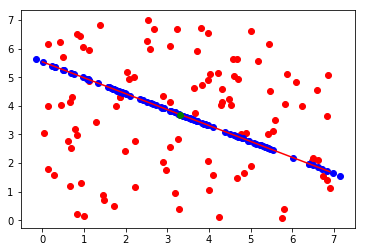

In [4]:
import copy
np.random.seed(0)
x_i_test = 7*np.random.rand(2,100)
x_i_0 = copy.deepcopy(x_i_test[0,:])
x_i_1 = copy.deepcopy(x_i_test[1,:])
print(x_i_test)

#1
m_x_i = makemean(x_i_test)

#2
mid_x_i = makedatamid(x_i_test,m_x_i)

#3
covmat_i = computecov(mid_x_i)

#4
eigenvalue_i, eigenvector_i = np.linalg.eig(covmat_i)
print(eigenvalue_i)
print(eigenvector_i)
#chose the value egivenvalue[0]>eigenvalue[1] 이므로
real_e_vector_i = eigenvector_i[:,0]
print(real_e_vector_i)

y_hat_i = get_y_hat(mid_x_i , real_e_vector_i)
print(y_hat_i)
#make y point_return(mean is not 0)
y_point_return_i = make_y_return(y_hat_i, real_e_vector_i, m_x_i)
print(y_point_return_i)

#show result
plt.plot(x_i_0,x_i_1,'ro')
plt.plot(y_point_return_i[:,0],y_point_return_i[:,1],'bo')
drawline(x_i_test[0,:], real_e_vector_i, m_x_i)

B) Reducing the dimension of some real data

In [5]:
import copy
name_file ='./diabetes.csv'

columns = ['preg','glu','blo','skin','insul','bmi','dpf','age','outcome']
data_in = pd.read_csv(name_file, names=columns, sep=',')

#data_in.plot(kind='scatter',x='x1',y='x2',colors='red')

#preprocessing
preg = np.asarray(data_in['preg'])[1:].astype(float)
glu = np.asarray(data_in['glu'])[1:].astype(float)
blo = np.asarray(data_in['blo'])[1:].astype(float)
skin = np.asarray(data_in['skin'])[1:].astype(float)
insul = np.asarray(data_in['insul'])[1:].astype(float)
bmi = np.asarray(data_in['bmi'])[1:].astype(float)
dpf = np.asarray(data_in['dpf'])[1:].astype(float)
age = np.asarray(data_in['age'])[1:].astype(float)
outcome = np.asarray(data_in['outcome'])[1:].astype(float)

diabete_data = np.hstack([preg.reshape(-1,1),glu.reshape(-1,1),blo.reshape(-1,1),skin.reshape(-1,1),insul.reshape(-1,1),bmi.reshape(-1,1),dpf.reshape(-1,1),age.reshape(-1,1)])
diabete_data_0 = copy.deepcopy(diabete_data[outcome==0])
diabete_data_1 = copy.deepcopy(diabete_data[outcome==1])
print(diabete_data.shape)
print(diabete_data_0.shape)
print(diabete_data_1.shape)
diabete_data_0_t = np.transpose(diabete_data_0)
diabete_data_1_t = np.transpose(diabete_data_1)
print(diabete_data_0_t.shape)
print(diabete_data_1_t.shape)


(768, 8)
(500, 8)
(268, 8)
(8, 500)
(8, 268)


In [11]:
# for who do not have diabetes
diabete_data_0_x = makemean(diabete_data_0_t)
mid_0 = makedatamid(diabete_data_0_t,diabete_data_0_x)
cov_0_mat = computecov(mid_0)
egval_0 , egvec_0 = np.linalg.eig(cov_0_mat)
print(egval_0)
#print(egvec_0)
real_egvec_0 = egvec_0[:,:3]


#for who have diabetes
diabete_data_1_x = makemean(diabete_data_1_t)
mid_1 = makedatamid(diabete_data_1_t,diabete_data_1_x)
cov_1_mat = computecov(mid_1)
egval_1 , egvec_1 = np.linalg.eig(cov_1_mat)
print(egval_1)
#print(egvec_1)
real_egvec_1 = egvec_1[:,:3]

print(real_egvec_0)
print(real_egvec_1)

real_egvec_0.shape
mid_0.shape


[9.89211928e+03 6.35719604e+02 3.35509493e+02 1.68803911e+02
 1.09696778e+02 5.94468793e+00 8.29496469e-02 3.98568507e+01]
[1.93056017e+04 9.49743970e+02 4.85915651e+02 2.37328743e+02
 1.05317907e+02 4.26413913e+01 1.06296871e+01 1.26721488e-01]
[[-3.92571911e-03  2.70219781e-02 -1.57556443e-02]
 [ 9.82444168e-02  9.38449694e-01  2.29306531e-01]
 [ 1.50863307e-02  2.54983197e-01 -8.80893281e-01]
 [ 6.25506554e-02 -9.38019264e-02 -3.55097706e-01]
 [ 9.92724248e-01 -8.80763595e-02  1.54400468e-02]
 [ 2.01263790e-02  2.87455023e-02 -1.93114093e-01]
 [ 6.83817655e-04  2.15229013e-04 -1.43363601e-04]
 [-1.68958784e-02  1.90218185e-01 -8.70140973e-02]]
[[ 2.12533882e-03  2.49094385e-03 -2.50648668e-02]
 [-6.29377727e-02 -9.93441307e-01  4.46032634e-02]
 [-1.44590295e-02 -5.73702387e-02 -9.46571937e-01]
 [-5.86335567e-02  6.48231370e-02 -2.79022300e-01]
 [-9.96179768e-01  5.98962280e-02  2.77524857e-02]
 [-3.03591413e-03 -6.93709269e-03 -6.14706114e-02]
 [-2.76351747e-04  1.21115403e-04 -1.18

(8, 500)

In [25]:
#get y result
y_0_hat = get_y_hat_dia(mid_0, real_egvec_0)
y_1_hat = get_y_hat_dia(mid_1, real_egvec_1)
print(y_0_hat.shape)
mean_0 = diabete_data_0_x[:3]
mean_1 = diabete_data_1_x[:3]

y_0_return = make_y_return_dia(y_0_hat,real_egvec_0,mean_0)
y_1_return = make_y_return_dia(y_1_hat,real_egvec_1,mean_1)

print(mean_0.shape)
print(mean_1.shape)
y_0_return.shape
real_egvec_0.shape
print(y_0_return)
print(y_1_return)

(500, 3)
(3, 1)
(3, 1)
[[-1.21368590e-01 -2.64524482e+01  6.20548807e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-7.25898572e-01 -2.15619181e+01 -3.92746279e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 6.18513430e-01  7.76813142e+00 -7.25162751e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 7.59006454e-01  8.15477791e+00  6.17461627e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.05858227e-02  1.07023499e+01  2.85041814e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 9.95764125e-02 -2.03940278e+01  4.55153350e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[  0.40163059   5.80626437   7.70758102 ...   0.           0.
    0.        ]
 [ -0.23772837  42.26057555 -11.03305021 ...   0.           0.
    0.        ]
 [ -0.8046767   -5.45072095 -25.66253392 ...   0.           0.
    0.        ]
 ...
 [  0.52639748  50.99301972  19.45116401 ...   0.           0.
    0.        ]
 [  0.33294571  27.7

In [0]:
x = np.vstack([x1,x2])
m_x = makemean(x)
m_x

mid_x = makedatamid(x,m_x)
covmat = computecov(mid_x)
covmat

array([[1.34854348, 0.86535425],
       [0.86535425, 1.02642386]])

[2.06769855 0.30726878]
[[ 0.76908317 -0.63914872]
 [ 0.63914872  0.76908317]]
[-0.63914872  0.76908317]


Text(0, 0.5, 'x2')

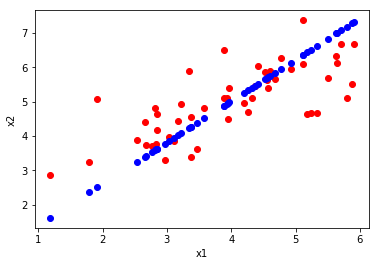

In [0]:
#set u
x1_sum = x1.sum()
x2_sum = x2.sum()
sum_arr = np.array([x1_sum,x2_sum])
#1
u_arr = sum_arr/len(x1)
#print(u_arr)
x_arr = np.vstack([x1,x2])
new_0 = x1-u_arr[0]
new_1 = x2-u_arr[1]
#2
new_x_arr = np.vstack([new_0,new_1])
#print(new_x_arr)

#3
dotmat = np.matmul(new_x_arr,np.transpose(new_x_arr))
dotmat_real = dotmat/len(x1)
cov_mat = dotmat_real
#print(cov_mat)

w, v =np.linalg.eig(cov_mat)
print(w)
print(v)
#print(v[:,0])
print(v[:,1])

eigenvector = v[:,0]
t =x1 #np.arange(0,7,0.1)
#print(eigenvector)
b = (eigenvector[0]/eigenvector[1])*(t-u_arr[0])+u_arr[1]
#plt.plot(t,b,'b-')
#print(eigenvector)
y_hat = np.dot(np.transpose(new_x_arr),eigenvector.reshape(-1,1))
#print('y_hat = ',y_hat)

plt.figure(5)
#plt.quiver(y_hat)
plt.plot(x1,x2,'ro')
plt.plot(t,b,'bo')
plt.xlabel('x1')
plt.ylabel('x2')
